Section 1 - Loading the dataset

In [39]:
import pandas as pd

#1.1 Load the dataset into a dataframe named df.
file_path = "housing.csv"  
df = pd.read_csv(file_path)

#1.2 Print the number of rows and columns in the dataframe.
print(df.shape)

#1.3 Print the first 5 rows of the dataframe.
print(df.head())

(20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Section 2 - Performing Exploratory Data Analysis on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
Column Name and Types: 
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_incom

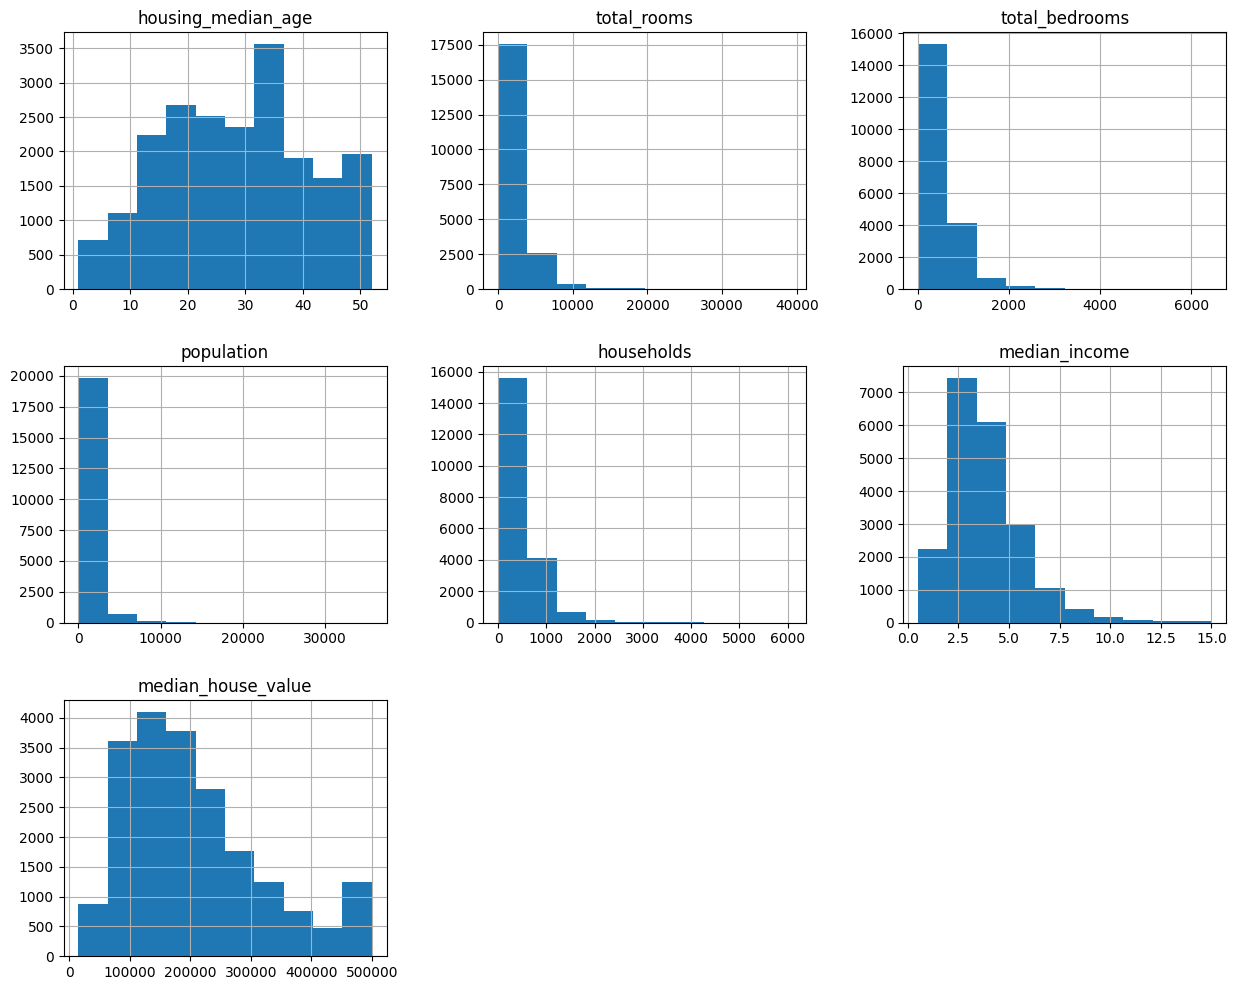

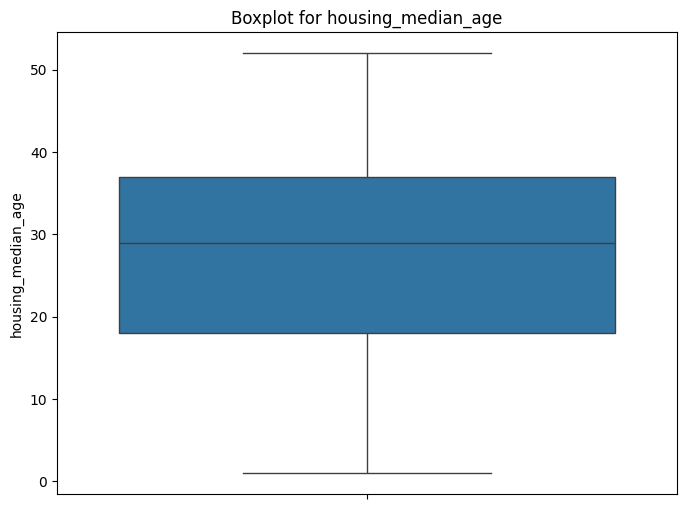

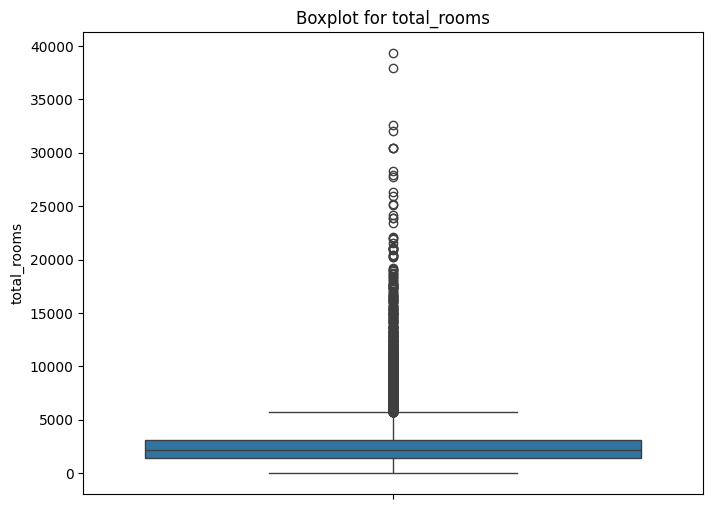

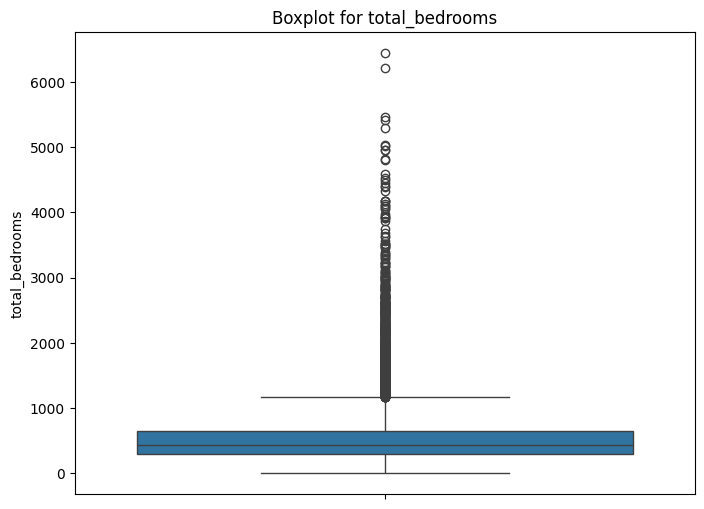

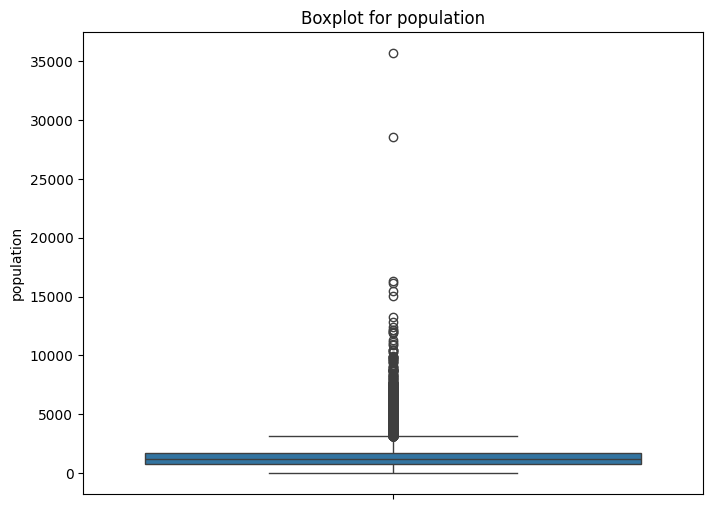

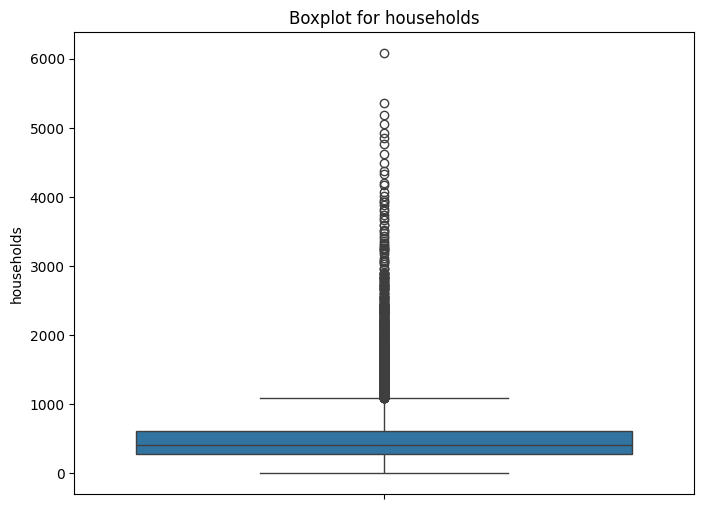

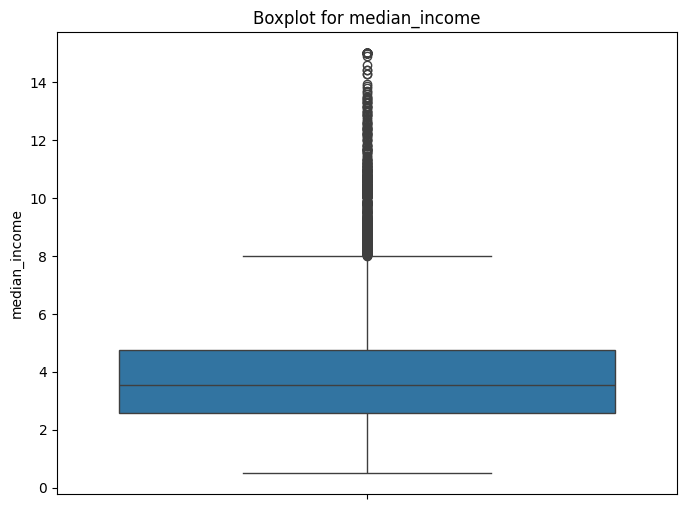

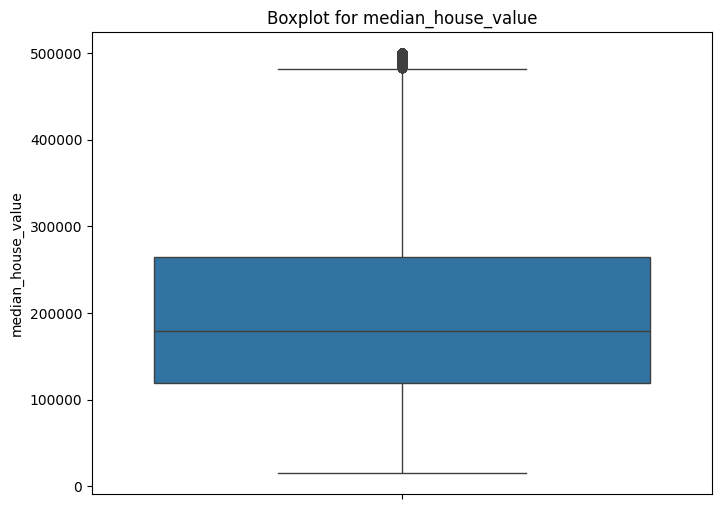

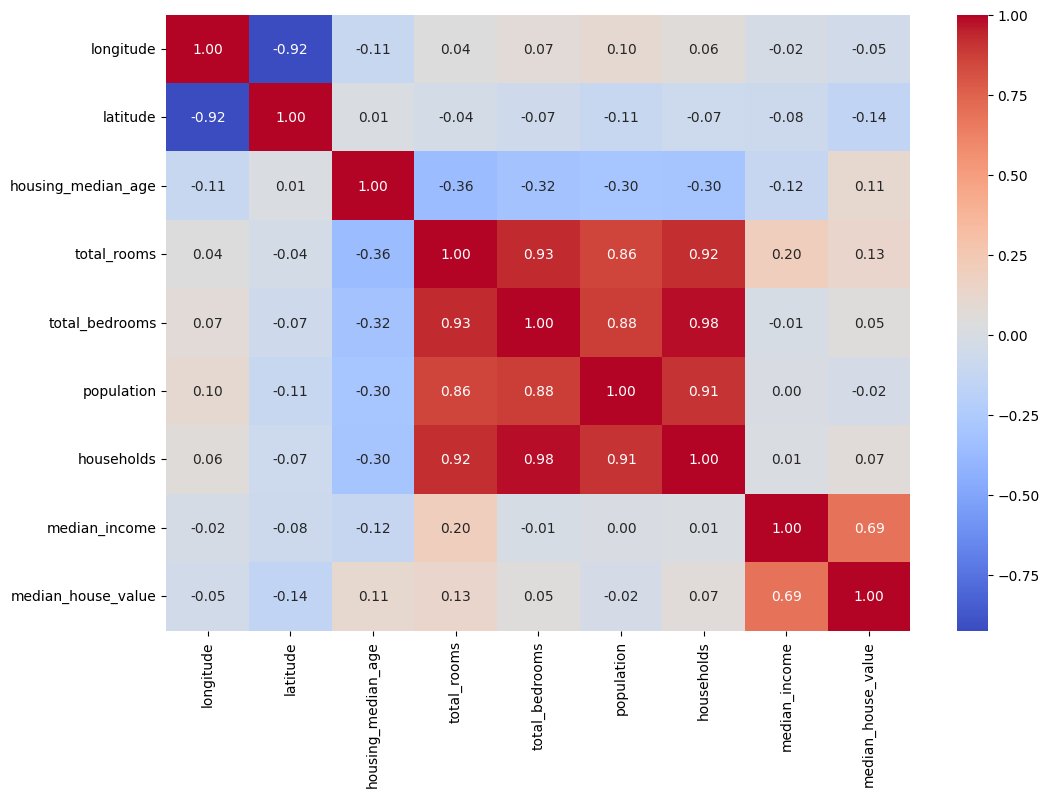

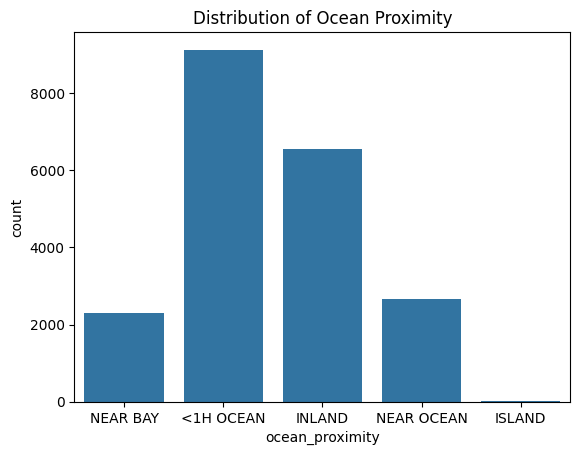

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())

# 2.1 Print name of all the columns and type of each column (numerical or categorical)
print("Column Name and Types: ")
print(df.dtypes)

# 2.2 Plot histogram distributions for all numerical columns except latitude and longitude
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].drop(columns=['latitude', 'longitude']).hist(figsize=(15, 12))
plt.show()

# 2.3 Plot box plots for all numerical columns except latitude and longitude
for col in numerical_cols:
    if col not in ['latitude', 'longitude']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(df[col])
        plt.title(f"Boxplot for {col}")
        plt.show()

# 2.4 Plot a heatmap to check correlation between numerical features and with target feature
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# 2.5 Plot a barplot to check how many houses are in different subcategories of 'ocean_proximity'
sns.countplot(x='ocean_proximity', data=df)
plt.title('Distribution of Ocean Proximity')
plt.show()

Section 3- Preprocessing the dataset

In [50]:
# 3.1 Find if there are any NaN values in the dataset
print("Missing values in dataset:")
print(df.isnull().sum())

# 3.2 Impute the NaN values with the median value of the column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# 3.3 Remove the outlier datapoints from the dataset
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = zscore(df[numerical_cols])
abs_z_scores = np.abs(z_scores)

# Set a threshold for removing outliers (e.g., Z-score > 3)
df_cleaned = df[(abs_z_scores < 3).all(axis=1)]

# 3.4 Encode the categorical variable 'ocean_proximity' using Label Encoder
# Apply one-hot encoding for 'ocean_proximity'
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)  # drop_first=True to avoid dummy variable trap

Missing values in dataset:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Section 4. Splitting the dataset

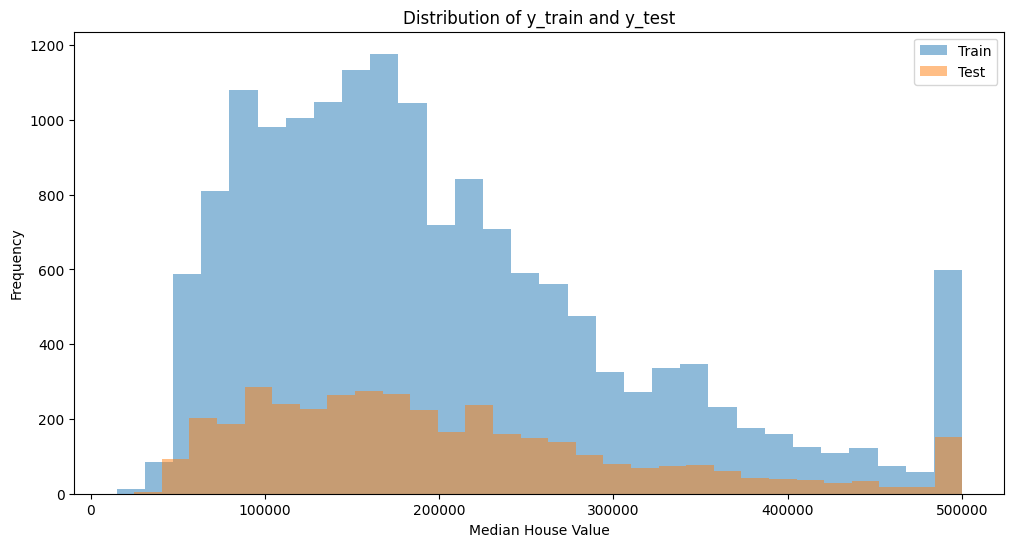

In [51]:
# 4.1 Store 'median_house_value' as the target
# Store 'median_house_value' as the target and remove it from features
target = df_encoded['median_house_value']
df_encoded.drop('median_house_value', axis=1, inplace=True)


# 4.2 Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)


# 4.3 Plot histogram distributions for y_train and y_test
import matplotlib.pyplot as plt

# Plot histogram distribution for y_train and y_test
plt.figure(figsize=(12, 6))
plt.hist(y_train, bins=30, alpha=0.5, label='Train')
plt.hist(y_test, bins=30, alpha=0.5, label='Test')
plt.legend(loc='upper right')
plt.title('Distribution of y_train and y_test')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


Section 5. Training the model

In [52]:
# 5.1 Define and train the linear regression model
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


# 5.2 Compute Mean Squared Error and R^2 on train and test data
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on train and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Compute performance metrics for train and test data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print results
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2:", train_r2)
print("Test R2:", test_r2)



Train MSE: 4447708509.59737
Test MSE: 4527337547.726282
Train R2: 0.6353381266335332
Test R2: 0.6355028418257964


Section 6. Feature importance and Feature selection

In [ ]:
#6.1 Find top 3 features which are most useful in predicting the median_house_value.
# Get feature importance from the model coefficients
feature_importance = abs(model.coef_)
feature_names = X_train.columns

# Sort the features by importance
sorted_idx = feature_importance.argsort()[::-1]  # Sort in descending order
top_3_features = feature_names[sorted_idx][:3]

# Print top 3 features
print("Top 3 features:", top_3_features)


#6.2 Drop all other features and train your model using only these 3 features and compute the R square and mean_squared_error.
# Select only the top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

# Train the model with the top 3 features
model.fit(X_train_top3, y_train)

# Make predictions
train_predictions_top3 = model.predict(X_train_top3)
test_predictions_top3 = model.predict(X_test_top3)

# Compute performance metrics
train_mse_top3 = mean_squared_error(y_train, train_predictions_top3)
test_mse_top3 = mean_squared_error(y_test, test_predictions_top3)
train_r2_top3 = r2_score(y_train, train_predictions_top3)
test_r2_top3 = r2_score(y_test, test_predictions_top3)

# Print results
print("Train MSE (Top 3 features):", train_mse_top3)
print("Test MSE (Top 3 features):", test_mse_top3)
print("Train R2 (Top 3 features):", train_r2_top3)
print("Test R2 (Top 3 features):", test_r2_top3)


#6.3 Compare the performance of the original model (using all the features) with the currentmodel.# Compare performance of original and reduced models
print("\nOriginal Model Performance:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2:", train_r2)
print("Test R2:", test_r2)

print("\nTop 3 Features Model Performance:")
print("Train MSE (Top 3):", train_mse_top3)
print("Test MSE (Top 3):", test_mse_top3)
print("Train R2 (Top 3):", train_r2_top3)
print("Test R2 (Top 3):", test_r2_top3)


Top 3 features: Index(['ocean_proximity_ISLAND', 'median_income', 'ocean_proximity_INLAND'], dtype='object')
Train MSE (Top 3 features): 5499654924.933584
Test MSE (Top 3 features): 5703249519.862823
Train R2 (Top 3 features): 0.5490903993668088
Test R2 (Top 3 features): 0.5408298540955019

Original Model Performance:
Train MSE: 4447708509.59737
Test MSE: 4527337547.726282
Train R2: 0.6353381266335332
Test R2: 0.6355028418257964

Top 3 Features Model Performance:
Train MSE (Top 3): 5499654924.933584
Test MSE (Top 3): 5703249519.862823
Train R2 (Top 3): 0.5490903993668088
Test R2 (Top 3): 0.5408298540955019
